In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import warnings
from astropy.wcs import WCS
from astropy.io import fits
from scipy.optimize import curve_fit, root_scalar
from spectral_cube import SpectralCube
from lmfit import Model, Parameters
from scipy.interpolate import interp1d
import pandas

In [ ]:
data_path = '/home/scratch/hfwest/Pilot/'

nu11 = 23.6944955e9
original = SpectralCube.read(data_path + 'Data/Pilot_NH3_11_bl2.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nu11*u.Hz)
amp = fits.open(data_path + 'Results/33/Pilot_NH3_33_bl2_Max33_single_component.fits')[0].data
sigma = fits.open(data_path + 'Results/Pilot_NH3_33_bl2_Sigma11_single_component.fits')[0].data
vel = fits.open(data_path + 'Results/Pilot_NH3_11_bl2_Vel11_single_component.fits')[0].data

In [3]:
nx = original.shape[2]
ny = original.shape[1]

x_range = original.spectral_axis.value

gaussian_data = np.zeros_like(original)

def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-(x - mean)**2 / (2 * sigma**2))

In [4]:
for j in range(ny):
    for i in range(nx):
        gaussian_data[:, j, i] = gaussian(x_range, amp[j, i], vel[j, i], sigma[j, i])

/tmp/ipykernel_269239/2192992209.py:9: RuntimeWarning: divide by zero encountered in divide
  return amp * np.exp(-(x - mean)**2 / (2 * sigma**2))


In [5]:
output_fits = fits.PrimaryHDU(gaussian_data)
output_fits.writeto('/home/scratch/hfwest/Pilot/Results/gaussian_map_11_single_component.fits', overwrite=True)

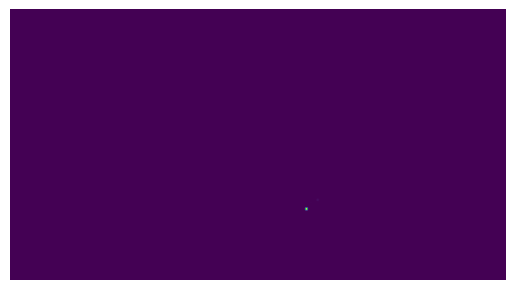

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
num_frames = gaussian_data.shape[0]

image = ax.imshow(gaussian_data[0, :, :], origin= 'lower')
def update(frame):
    image = ax.imshow(gaussian_data[frame, :, :], origin= 'lower')
    ax.axis('off')
    return image

anim = animation.FuncAnimation(fig = fig, func = update, frames = num_frames, interval = 30)
anim.save(filename= '/home/scratch/hfwest/Pilot/Results/gaussian_map_11_single_component.gif', writer= 'pillow')